# Case Study #2

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the excel file into a pandas dataframe.
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
# Diplay the dataset
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This dataset contains the following data

there is 1000 rows and 8 features.
this dataset has gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score and writing score features.

In [5]:
# Calculating the null values present in each columns in the dataset

data.isna().sum() # or you can use df.isnull().sum() as well

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As you can see that, there is no missing values present in the dataset. so we can move to the questions

### 1. Find out how many males and females participated in the test.


In [6]:
# calculating the gender feature with values inside in the dataset
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [7]:
# Categorical data visualization
colors = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e'] # different colors for graph color

# we can create a fuction to display the univariate analysis

def cat_univariate_analysis(feature): 
    
    #calculate the each column values inside and sort the order for better view
    data_ = data[feature].value_counts().sort_values(ascending=True) 

    # set the graph size and color
    plt.figure(figsize=(20,5), facecolor='white')

    # display the first graph in one visualization
    plt.subplot(1,2,1)

    # using barh for horizonatal view of bar chart
    plt.barh(y=data_.index, width=data_.values, 
             height=0.7, color=colors, edgecolor='k',linewidth=1)
    
    # The despine() is a function that removes the spines from the right and upper portion of the plot by default
    sns.despine() 

    # display the second graph in one visualization
    ax = plt.subplot(1,2,2)

    # using pie chart you can see the circle portion of how each values differ from each portion.
    ax.pie(x=data_.values, 
           labels=data_.index, 
           colors=colors, 
           radius=1.2, 
           autopct="%1.1f%%", 
           shadow=True, 
           explode=[0.04 for i in range(data[feature].nunique())]) # number of unique count in each column
    # display the circle for pie chart
    ax.add_artist(plt.Circle((0,0), 0.4, fc='white'))
    plt.suptitle(t=feature, x=0.5, y=1.1, fontfamily='serif', fontsize=20, color='k', fontweight='bold',alpha=0.8)
    plt.show()

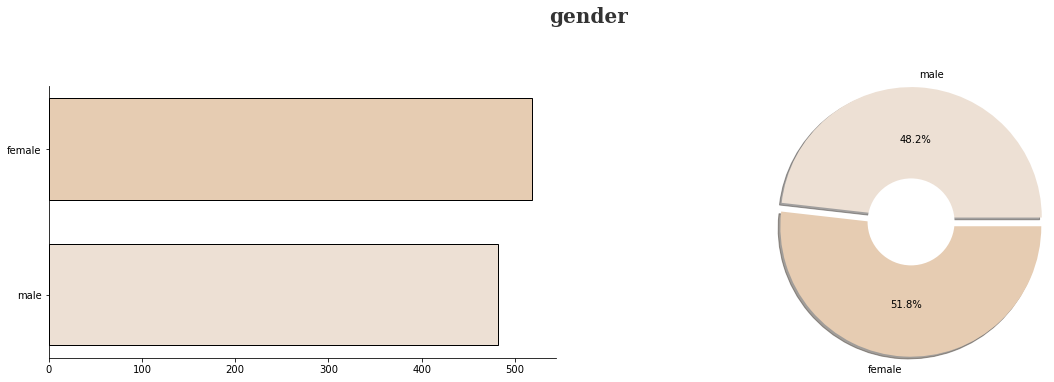

In [8]:
# calling the fuction with gender feature for clear data visualization
cat_univariate_analysis('gender')

The gender feature, we can clearly see the bar horizontal view and pie chart view of gender. 
There are 518 females and 482 males are participated in the test.

### 2. What do you think about the students' parental level of education?


In [9]:
# calculating the parental level of education feature with values inside in the dataset
parental_education = data['parental level of education'].value_counts()
parental_education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

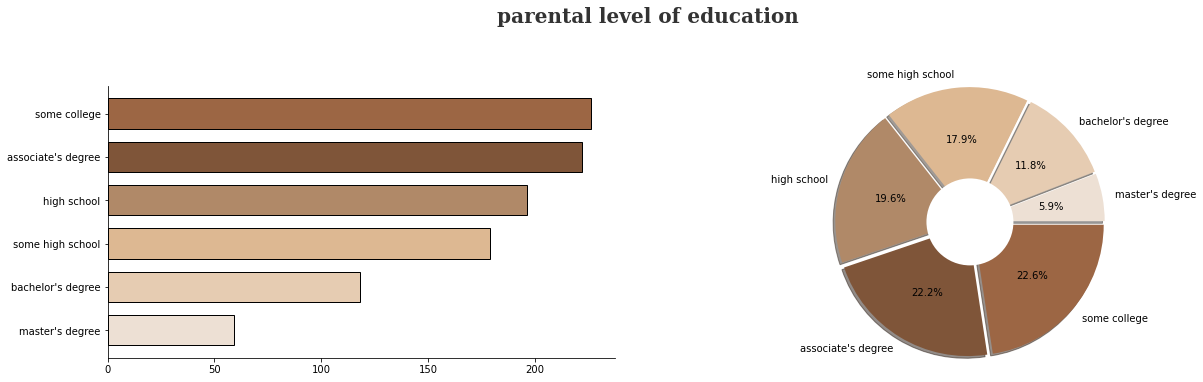

In [10]:
# calling the fuction with parental level of education feature for clear data visualization
cat_univariate_analysis('parental level of education')

the students' parental level of education is here mentioned with high number of parents having some college level of education with 22.6% out of other education,  so we can say that it is more than associate's degree  with 22.2% out of other education . And few parents holding master's degree level of education with 5.9% out of 100%. Bachelor's degree of parental level of education is 11.8% , high school level is 19.6% and rest of them are holding some high school level of educations.


### 3. Who scores the most on average for math, reading and writing based on
- **Gender**



In [11]:
# calculating the gender wise average scores for math, reading and writing
avg_scores_gender = data.groupby('gender')['math score','reading score','writing score'].mean()
avg_scores_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


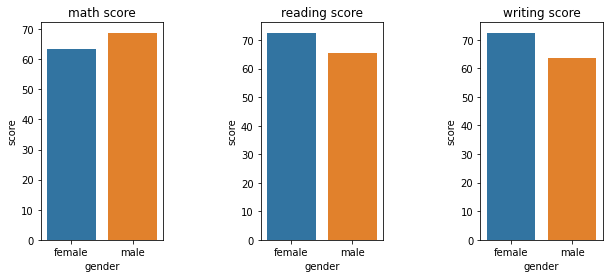

In [12]:
# display the multiple graph in one visualization
fig, ax = plt.subplots()

# arranging the multiple graph 
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3): # loop for all three features
    plt.subplot(1,3, idx+1) 
    gender_df = data.groupby("gender")[list(data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data.columns[-3:])[idx])

Based on gender, males scored the most on average for math but less in reading and writing while females scored less in math but better scores in reading and writing.

- **Test preparation course**

In [13]:
# calculating the test preparation course wise average scores for math, reading and writing
avg_scores_test = data.groupby('test preparation course')['math score','reading score','writing score'].mean()
avg_scores_test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


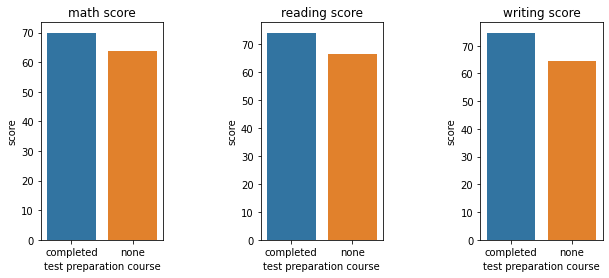

In [14]:
# display the multiple graph in one visualization
fig, ax = plt.subplots()

# arranging the multiple graph 
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3): # loop for all three features
    plt.subplot(1,3, idx+1)
    gender_df = data.groupby("test preparation course")[list(data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data.columns[-3:])[idx])

Based on Test preparation course, those who completed the course scored more in math, reading and writing while those who do not completed the course scored less in  math, reading and writing.

### 4. What do you think about the scoring variation for math, reading and writing based on
- **Gender**


In [15]:
# checking the scoring variation for math
math_score_gender = data.groupby('gender')['math score'].describe()
math_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


the scoring variation for math, females, 50% of the females has 65 scores or more while for males, 69 marks or more. So we can say that male is performing well than females. The maximum score for maths is 100 for both males and females, the minimum mark scored by the females is 0 and males is 27.

In [16]:
# checking the scoring variation for reading
reading_score_gender = data.groupby('gender')['reading score'].describe()
reading_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


the scoring variation for reading, females, 50% of the females has 73 scores or more while for males, 66 marks or more. So we can say that male is out performing than females in reading. The maximum score for reading is 100 for both males and females, the minimum mark scored by the females is 17 and males is 23.

In [17]:
# checking the scoring variation for writing
writing_score_gender = data.groupby('gender')['writing score'].describe()
writing_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


the scoring variation for writing, females, 50% of the females has 74 scores or more while for males, 64 marks or more. So we can say that male is out performing than females in writing. The maximum score for reading is 100 for both males and females, the minimum mark scored by the females is 10 and males is 15.

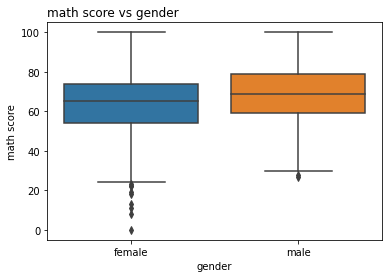

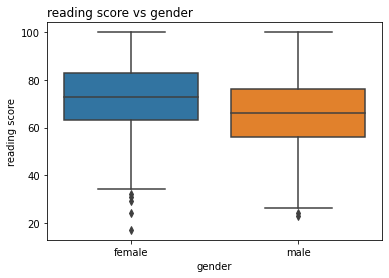

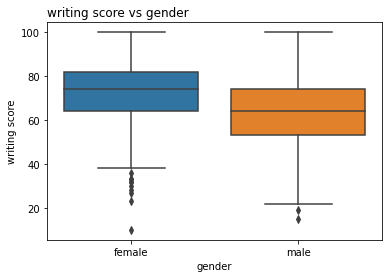

In [18]:
# data visualization for each features
for item in data.columns[-3:]:
    sns.boxplot(x=data["gender"], y=data[item]) # checking any outliers present in the dataset 
    plt.title(item+" vs gender", loc="left")
    plt.show()

Based on the gender score variation for math, reading and writing using boxplot you can clearly say that outliers present in the each 3 features. Like average wise males scored the most on average for math but less in reading and writing while females scored less in math but better scores in reading and writing.

- **Test preparation course**

In [19]:
# checking the scoring variation for math
math_score_test = data.groupby('test preparation course')['math score'].describe()
math_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


the scoring variation for math, those who completed the course scored more in math while those who do not completed the course scored less in  math. Top 25% of the students scored  79 marks or above while 74 marks or above in those who not completed the course. The maximum score is 100 for each and minimum score for test completed students is 23 while zero mark in those who do not completed the course. The average marks for those who completed the test is 70 or more and 64 mark for those who do not.

In [20]:
# checking the scoring variation for reading
reading_score_test = data.groupby('test preparation course')['reading score'].describe()
reading_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


the scoring variation for reading, those who completed the course scored more in reading while those who do not completed the course scored less in  reading. Top 25% of the students scored  84 marks or above while 76 marks or above in those who not completed the course. The maximum score is 100 for each and minimum score for test completed students is 37 while 17 mark in those who do not completed the course. The average marks for those who completed the test is 75 or more and 67 mark for those who do not.

In [21]:
# checking the scoring variation for writing
writing_score_test = data.groupby('test preparation course')['writing score'].describe()
writing_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


the scoring variation for writing, those who completed the course scored more in writing while those who do not completed the course scored less in  writing. Top 25% of the students scored  83.75 marks or above while 74 marks or above in those who not completed the course. The maximum score is 100 for each and minimum score for test completed students is 36 while 10 mark in those who do not completed the course. The average marks for those who completed the test is 76 or more and 65 mark for those who do not.

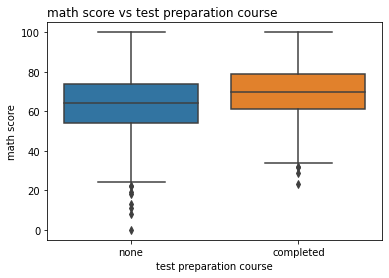

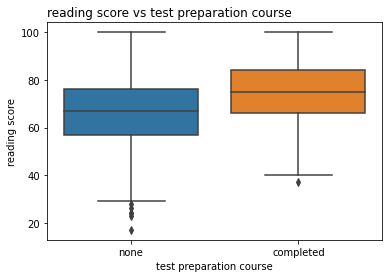

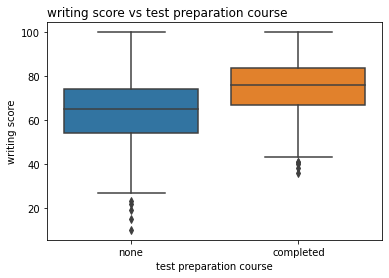

In [22]:
# data visualization for each features
for item in data.columns[-3:]:
    sns.boxplot(x=data["test preparation course"], y=data[item]) # checking any outliers present in the dataset 
    plt.title(item+" vs test preparation course", loc="left")
    plt.show()

Based on the test preparation course, score variation for math, reading and writing using boxplot you can clearly say that outliers present in the each 3 features. Like average wise those who completed the course scored more in math, reading and writing while those who do not completed the course scored less in math, reading and writing.

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [23]:
# statistical summary of the data
data.describe().T # diagonal by writing rows as columns 

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


the top 25% of students based on their maths score is 77 so we need to store this data to another dataframe for calculation.

In [24]:
# calculate the top 25% marks scored students
top25 = data[(data['math score'] >= 77.00)]
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [25]:
# calculating it with gender 
math_top25 = top25['gender'].value_counts()
math_top25

male      151
female    104
Name: gender, dtype: int64

In [27]:
math_top25.sum()

255

As you can see there are 255 students who scored 77 or more marks in maths and amoung 151 are males and 104 are females. So these students can achieve the bonus points from management.